PROJEKT

Projekt dotyczy analizy danych ofert sprzedaży mieszkań z  15 największych miast w Polsce. Są to  Białystok
Bydgoszcz
Częstochowa
Gdańsk
Gdynia
Katowice
Kraków
Lublin
Łódź
Poznań
Radom
Rzeszów
Szczecin
Warszawa
Wrocław

In [15]:
#Importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Wyjaśnienia zmiennych 

- **city** — Nazwa miasta, w którym znajduje się nieruchomość.
- **type** — Typ budynku (np. blockOfFlats – blok, apartmentBuilding – kamienica/budynek wielorodzinny).
- **squareMeters** — Powierzchnia mieszkania w metrach kwadratowych (m²).
- **rooms** — Liczba pokoi w mieszkaniu.
- **floor** — Piętro, na którym zlokalizowane jest mieszkanie.
- **floorCount** — Całkowita liczba pięter w budynku.
- **buildYear** — Rok budowy budynku.
- **latitude, longitude** — Współrzędne geograficzne nieruchomości.
- **centreDistance** — Odległość od centrum miasta (w km).
- **poiCount** — Liczba punktów użyteczności publicznej (POI) w promieniu 500 m od mieszkania.
- **[poiName]Distance** — Odległość do najbliższego punktu użyteczności publicznej danego typu (np. schoolDistance, pharmacyDistance).
- **ownership** — Rodzaj własności (np. condominium – własność, cooperative – spółdzielcze).
- **condition** — Stan/standard wykończenia mieszkania (np. premium, high, low).
- **has[features]** — Zmienne logiczne (tak/nie) opisujące udogodnienia:
-  **hasParkingSpace**, **hasBalcony**, **hasElevator**, **hasSecurity**, **hasStorageRoom**.
- **price** — Cena oferty w Polskich Złotych (PLN).


In [16]:
# pobranie danych z pliku CSV i wyświetlenie pierwszych kilku wierszy
import pandas as pd
df = pd.read_csv("apartments_pl_2024_06.csv", encoding="utf-8")
print(df.head())

                                 id      city               type  \
0  811891f98a870dfd6e414374a0a85560  szczecin       blockOfFlats   
1  adaf636d0c44d8d9325bce42403eefee  szczecin  apartmentBuilding   
2  9b957bd60885a469c96f17b58a914f4b  szczecin  apartmentBuilding   
3  74fef2ff7135bc70797a3fbfd7d44ed6  szczecin       blockOfFlats   
4  77cc78c75b0d09bf84d6d3124a28803c  szczecin       blockOfFlats   

   squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
0         47.00    2.0    6.0        12.0     1981.0  53.428544  14.552812   
1         88.22    3.0    1.0         2.0     2000.0  53.449093  14.516844   
2        117.00    5.0    4.0         4.0        NaN  53.443096  14.561348   
3         33.31    1.0    1.0         4.0     1963.0  53.436100  14.541200   
4         56.00    3.0    7.0         7.0     2018.0  53.447465  14.557811   

   ...  pharmacyDistance    ownership  buildingMaterial  condition  \
0  ...             0.085  condominium      concreteS

In [17]:
# liczba brakujacych danych (całkowita)
n_miss = df.isna().sum().sum()
print("n_miss:", n_miss)  

# liczba kompletnych obserwacji (wierszy bez braków)
n_complete = df.dropna().shape[0]
print("n_complete:", n_complete)  # liczba kompletnych obserwacji

# proporcja braków (w skali całego dataframe)
prop_miss = n_miss / (df.shape[0] * df.shape[1])
print("prop_miss:", prop_miss)  # proporcja brakujacych danych

# dodatkowo: brakujące wartości na kolumnę (opcjonalne)
print("missing per column:\n", df.isna().sum())

# show computed values (do not call integers/floats as functions)
print("n_complete (computed):", n_complete)  # liczba kompletnych obserwacji
print("prop_miss (computed):", prop_miss)    # proporcja

n_miss: 37990
n_complete: 2750
prop_miss: 0.0631033772515564
missing per column:
 id                          0
city                        0
type                     4397
squareMeters                0
rooms                       0
floor                    3573
floorCount                209
buildYear                3380
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             11
clinicDistance             63
postOfficeDistance         20
kindergartenDistance       19
restaurantDistance         31
collegeDistance           584
pharmacyDistance           30
ownership                   0
buildingMaterial         8792
condition               15921
hasParkingSpace             0
hasBalcony                  0
hasElevator               960
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64
n_complete (computed): 2750
prop_miss (computed): 0.0631033772515

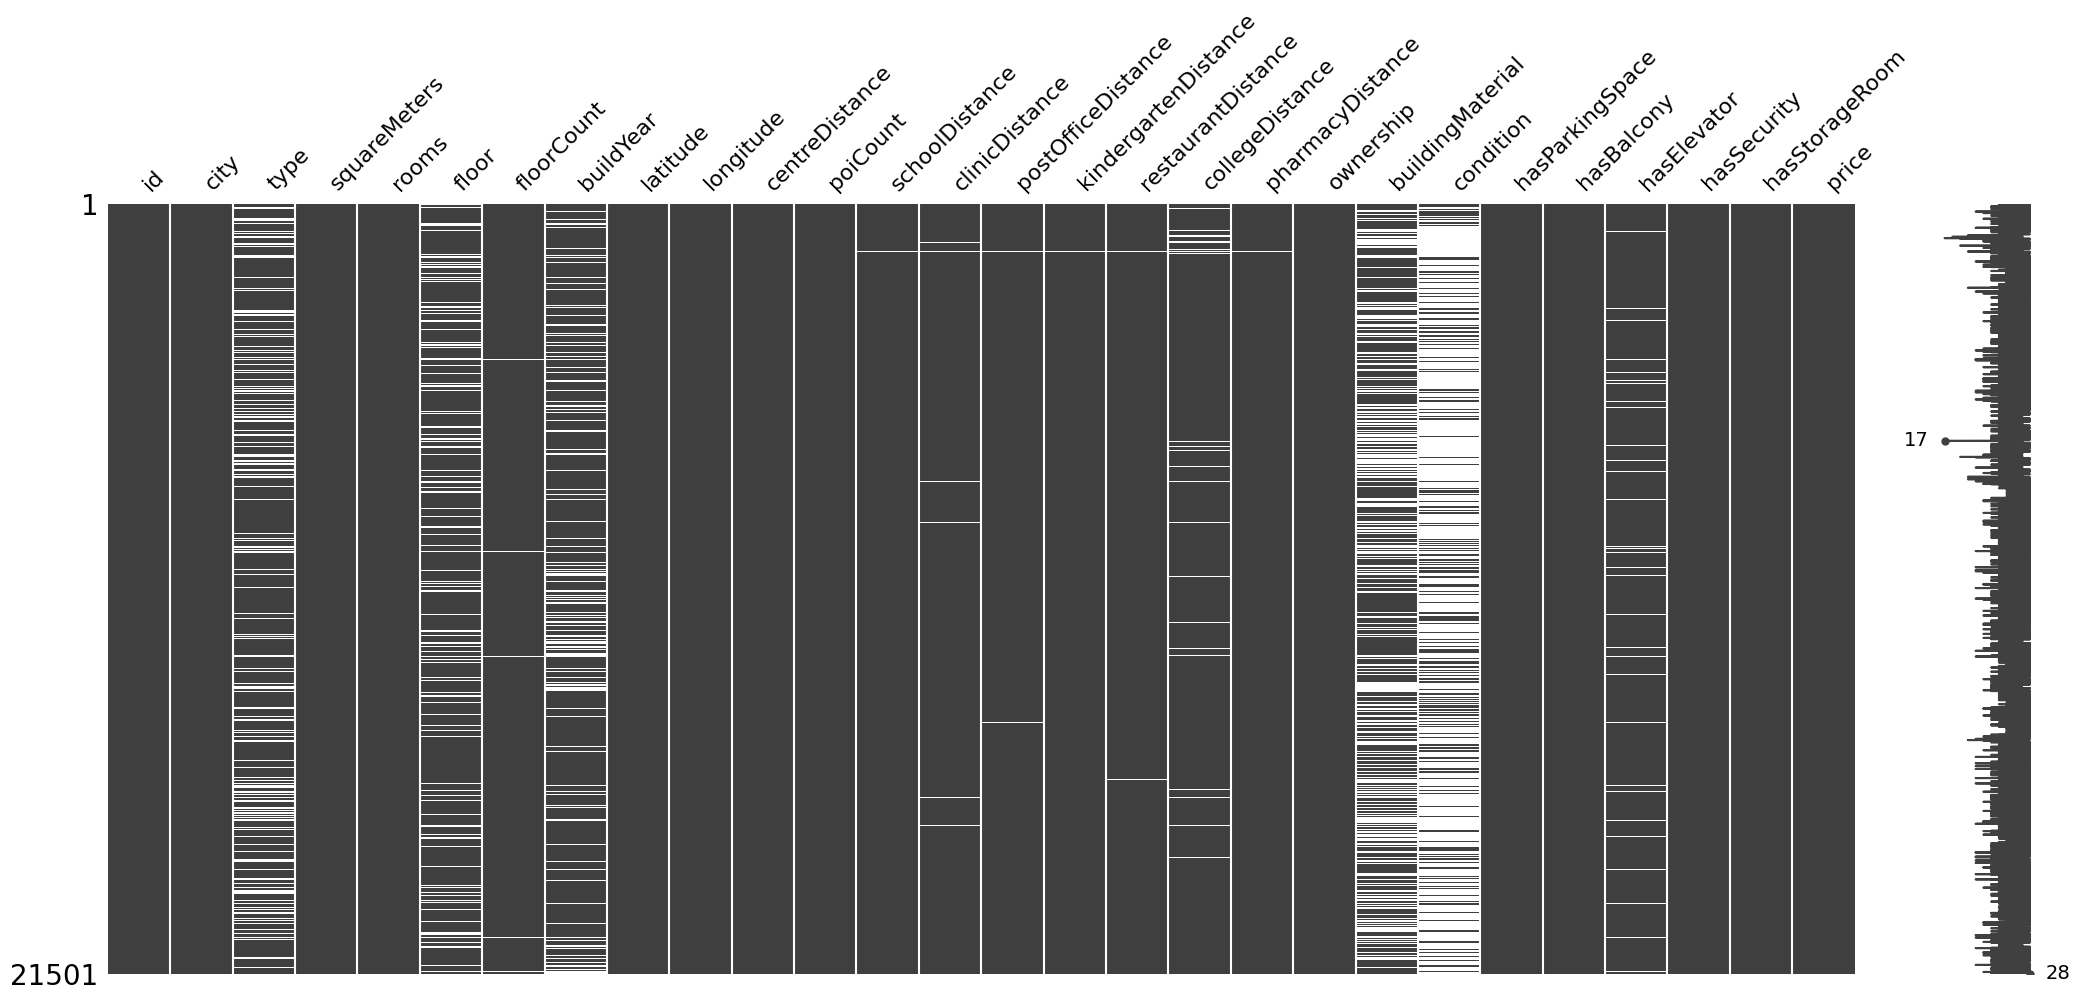

In [18]:
# wizualizacja brakujących danych 
import missingno as msno
# jeśli plt nie jest zdefiniowane (np. komórka z importem nie została uruchomiona), zaimportuj je
try:
	plt
except NameError:
	import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

Wykres przedstawia brakujące wartości w badanym zbiorze danych.
 Ciemne pola to dane kompletne, a białe brakujące.
 Zmienne niemal kompletne to: city, type, squareMeters, rooms, latitude, longitude, price. Są one istotnymi zmiennymi i są prawie całkowicie pozbawione braków. Przedstawia to jednolity ciemny wykres.Zmienne z umiarkowanymi brakami (Losowe):Braki występują losowo i równomiernie (cienkie, rozproszone paski) w kolumnach typu: floor, buildYear, centreDistance, poiCount (i inne zmienne dystansowe).Zmienne Problemowe (Dużo Braków):buildingMaterial i condition mają największą liczbę braków (szacunkowo 40–60% w przypadku buildingMaterial). Wymagają one szczególnej uwagi przy czyszczeniu danych (imputacja lub usunięcie).Mniejsze braki występują w zmiennych binarnych opisujących wyposażenie, np.: hasParkingSpace, hasBalcony.🏁 PodsumowanieWiększość kluczowych danych (lokalizacja, metraż, cena) jest kompletna, co czyni zbiór gotowym do podstawowego modelowania. Braki koncentrują się głównie na zmiennych opisujących wyposażenie i stan budynku, co wymaga wdrożenia strategii, takich jak imputacja lub potraktowanie „braku danych” jako osobnej kategorii.